## Visualization, plotting and creating charts in Python Pandas
---------------------------------

Charts are important parts of data analysis and science. They can be created in Pandas in more than one way. The following is how I found the simple and handy way to demonstrate data through different kinds of plotting.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

In [2]:
df = pd.read_excel('pivotVisual.xlsx') # Importing real-world data in excel format.
df.head()                              # Showing the first 5 rows.

,Date,Year,Customer ID,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Product,Order Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2013-11-26,2013,11019,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,950
1,2015-11-26,2015,11019,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,950
2,2014-03-23,2014,11039,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1035,2401
3,2016-03-23,2016,11039,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,900,2088
4,2014-05-15,2014,11046,47,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,418


In [3]:
df.info()    # Size, number of rows, columns, types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Year              113036 non-null  int64         
 2   Customer ID       113036 non-null  int64         
 3   Customer Age      113036 non-null  int64         
 4   Customer Gender   113036 non-null  object        
 5   Country           113036 non-null  object        
 6   State             113036 non-null  object        
 7   Product Category  113036 non-null  object        
 8   Sub Category      113036 non-null  object        
 9   Product           113036 non-null  object        
 10  Order Quantity    113036 non-null  int64         
 11  Unit Cost         113036 non-null  int64         
 12  Unit Price        113036 non-null  int64         
 13  Cost              113036 non-null  int64         
 14  Reve

In [4]:
# Pivoting is very easy in Pandas, even easier than excel.

lineChart = df.pivot_table(['Revenue','Cost'], index='Year', aggfunc='sum')
lineChart   

,Cost,Revenue
Year,,
2011,6083587,8964888
2012,6223990,9175983
2013,9280829,15240037
2014,8288637,14152724
2015,12495428,20023991
2016,10677437,17713385


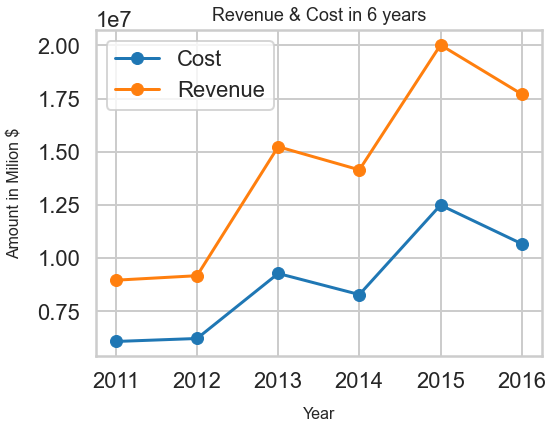

In [5]:
lineChart.plot(figsize=(8, 6), grid=True, style='o-')  # The line chart is as easy as this. Style brings the circle on each break.
plt.title("Revenue & Cost in 6 years", fontsize=18, y=1.01) # Title of the chart
plt.xlabel("Year", fontsize=16, labelpad=15)  # Describing x and y.
plt.ylabel("Amount in Milion $", fontsize=16, labelpad=15);

In [6]:
country = df.pivot_table(['Revenue'], index='Country', aggfunc='sum') 
country  # A different pivot table to show only aggregate for revenue.

,Revenue
Country,
Australia,21302059
Canada,7935738
France,8432872
Germany,8978596
United Kingdom,10646196
United States,27975547


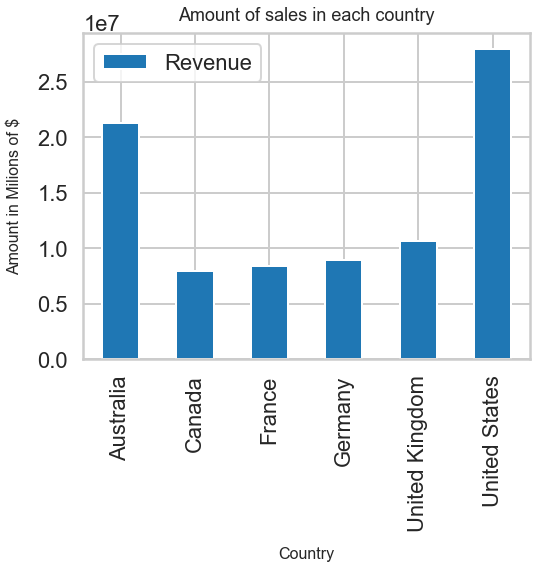

In [7]:
country.plot(kind = 'bar', figsize=(8, 6)) # Bar chart
plt.title("Amount of sales in each country", fontsize=18, y=1.02)
plt.xlabel("Country", fontsize=16, labelpad=15)
plt.ylabel("Amount in Milions of $", fontsize=16, labelpad=15);

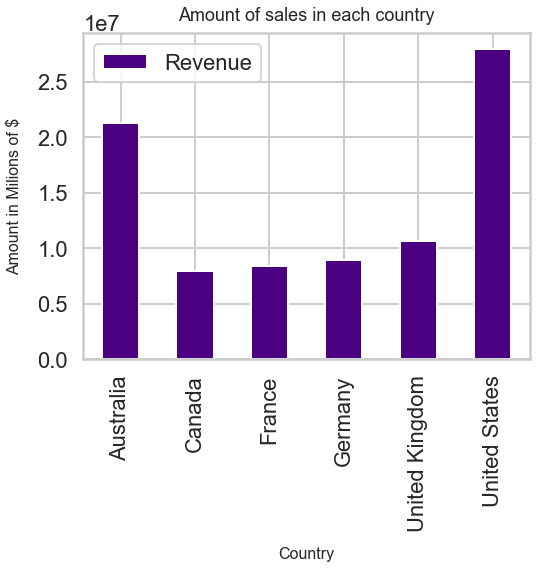

In [8]:
country.plot(kind = 'bar', figsize=(8, 6), color='indigo')  # The color of bars can be changed
plt.title("Amount of sales in each country", fontsize=18, y=1.02)
plt.xlabel("Country", fontsize=16, labelpad=15)
plt.ylabel("Amount in Milions of $", fontsize=16, labelpad=15);

In [9]:
countryCost = df.pivot_table(['Revenue','Cost'], index='Country', aggfunc='sum')
countryCost  # Cost and Revenue with countries as the index.

,Cost,Revenue
Country,,
Australia,14526029,21302059
Canada,4218442,7935738
France,5552590,8432872
Germany,5618601,8978596
United Kingdom,6232343,10646196
United States,16901903,27975547


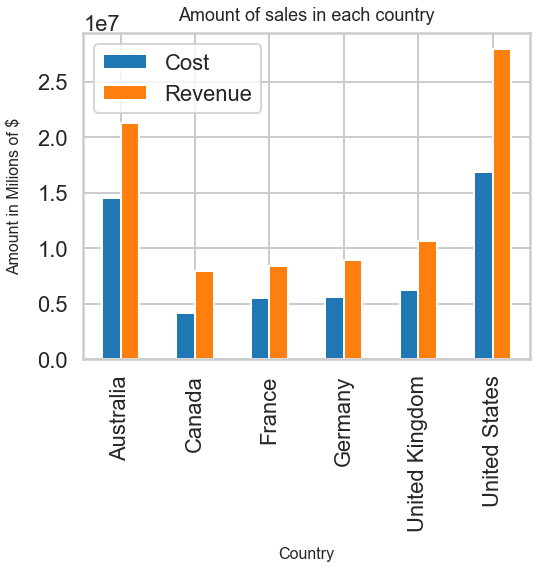

In [10]:
countryCost.plot(kind = 'bar', figsize=(8, 6))  # Two variables bar chart.
plt.title("Amount of sales in each country", fontsize=18, y=1.02)
plt.xlabel("Country", fontsize=16, labelpad=15)
plt.ylabel("Amount in Milions of $", fontsize=16, labelpad=15);

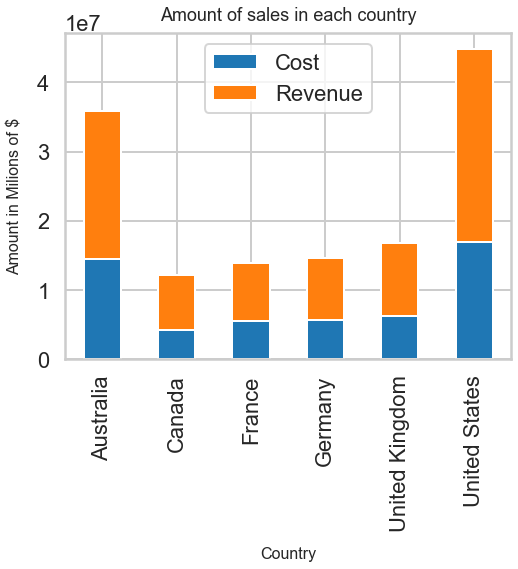

In [11]:
countryCost.plot(kind = 'bar', stacked=True, figsize=(8, 6)) #stacked=True shows both variables on one bar.
plt.title("Amount of sales in each country", fontsize=18, y=1.02)
plt.xlabel("Country", fontsize=16, labelpad=15)
plt.ylabel("Amount in Milions of $", fontsize=16, labelpad=15);

In [12]:
ProAge = df[['Revenue','Customer Age']].iloc[:100] # Slicing data to demonstrate the scatter plot better
ProAge

,Revenue,Customer Age
0,950,19
1,950,19
2,2401,49
3,2088,49
4,418,47
...,...,...
95,3236,41
96,281,32
97,94,32
98,941,32


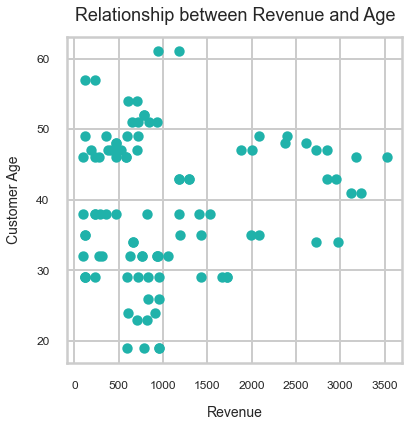

In [13]:
ProAge.plot.scatter(x='Revenue', y='Customer Age', s=70,figsize=(6,6), c='lightseagreen')
plt.title("Relationship between Revenue and Age", fontsize=18, y=1.03)
plt.xlabel("Revenue", fontsize=14, labelpad=15)
plt.ylabel("Customer Age", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6);

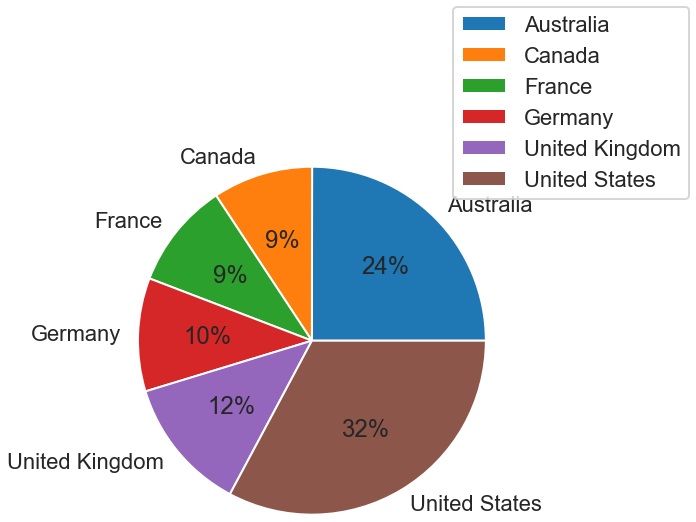

In [14]:
country.plot.pie(y='Revenue', radius=2, autopct='%i%%')  # Pie chart
#plt.title("Country's Revenue", fontsize=18, y=1.02)
#plt.axis('equal');  # Making sure the pie chart won't show in an oval shape.
plt.legend(bbox_to_anchor=(1.1, 1.1))  # Moving the list of countries around.